In [1]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

In [2]:
from scripts.profanity_check import profanity_processing
from scripts.embedding_model import universal_sentence_encoder
from scripts.clasterer import Clasterer

In [3]:
responses = [
    "Я люблю свою работу за большую зарплату",
    "Много денег",
    "Хочу много долларов",
    "100 тысяч рублей в секунду",
    "Денежные премии!",
    "Бумажки",
    "Бабосики))",
    "В коллективе царит атмосфера поддержки.",
    "Дружелюбная атмосфера делает работу приятнее.",
    "Мы как друзья, не только коллеги.",
    "Каждый может высказать свое мнение.",
    "Команда — настоящая дружная семья.",
    "Позитивная атмосфера заряжает энергией.",
    "Все готовы поддерживать друг друга.",
    "Мы можем делиться радостями и трудностями.",
    "Вместе справляемся с любыми задачами.",
    "Всегда можно обратиться за помощью.",
    "Еда всегда свежая и аппетитная.",
    "В нашем меню много интересных блюд.",
    "Коллеги любят делиться рецептами.",
    "Проводим обеды с удовольствием и смехом.",
    "Каждую неделю пробуем что-то новое.",
    "Вместе готовим вкусные угощения.",
    "Обсуждаем кулинарные эксперименты после работы.",
    "Мы создаем неповторимые гастрономические пары.",
    "Еда помогает нам лучше узнать друг друга.",
    "Собираемся на праздники за вкусной едой.",
    "Всегда есть возможности для обучения.",
    "Поддерживаем друг друга в развитии.",
    "Обсуждаем новые идеи на митингах.",
    "Курсы и тренинги доступны каждому.",
    "Каждый может предложить свой проект.",
    "Ставим цели и достигаем их вместе.",
    "Обратная связь помогает расти профессионально.",
    "Читаем книги и делимся знаниями.",
    "Нас мотивирует желание стать лучше."
    
]
import csv
responses = pd.read_csv('Answers.csv')
# responses = responses['Phrase'].tolist()
responses = [response.lower() for response in responses]
responses = np.array(responses)

In [ ]:
responses = pd.read_csv('Answers.csv').iloc[1:,0].reset_index(drop=True).to_numpy()
responses

In [ ]:
model = universal_sentence_encoder()

In [ ]:
embeddings = model.transform(responses).numpy()
embeddings

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
# umap_model = umap.UMAP(n_neighbors=3, n_components=2, random_state=42)
# embeddings_reduced = umap_model.fit_transform(embeddings)

# tsne = TSNE(n_components=2, random_state=42, perplexity = 3)
# embeddings_reduced = tsne.fit_transform(embeddings, )

svd_model = TruncatedSVD(n_components=2)
embeddings_reduced = svd_model.fit_transform(embeddings)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(embeddings_reduced)
labels = km.labels_
np.unique(labels, return_counts=True)

In [9]:
from scripts.summarizer import gpt_summarizer
gs = gpt_summarizer(offline = False, count_offline_words = 3)

In [ ]:
plt.figure(figsize=(15, 9))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], cmap='Spectral', s=50)

for i, label in enumerate(np.unique(labels)):
    embeddings_oneclass = embeddings_reduced[labels==label]
    title = gs.summarize(responses[labels==label], embeddings=embeddings_reduced[labels==label])
    plt.scatter(embeddings_oneclass.T[0], embeddings_oneclass.T[1], label = title, )
    plt.scatter(km.cluster_centers_[i, 0], km.cluster_centers_[i, 1], marker='*',)
plt.title('Projection of Dataset')
plt.xlabel('1 coordinate')
plt.ylabel('2 coordinate')
# plt.colorbar(label='Class Label')
plt.legend()
plt.show()

In [10]:
# Функция для вычисления косинусного расстояния до центра
def cosine_distance(point, center):
    dot_product = np.dot(point, center.T)
    norm_point = np.linalg.norm(point)
    norm_center = np.linalg.norm(center)
    if norm_point == 0 or norm_center == 0:
        return 1  # защитный случай, если один из векторов нулевой
    return 1 - (dot_product / (norm_point * norm_center))

centers = km.cluster_centers_
i=1
# Создайте список пар (косинусное расстояние, точка)
distances = [(cosine_distance(point, centers[i]), phrase) 
             for (point, phrase) in zip(embeddings_reduced[labels==i], responses[labels==i])]

# Отсортируйте по убыванию косинусного расстояния
sorted_points = sorted(distances, key=lambda x: x[0], reverse=False)

# Получите упорядоченные точки
ordered_points = np.array([point for _, point in sorted_points])

In [1]:
import pandas as pd
csv_file = 'Answers.csv'
data = pd.read_csv(csv_file).iloc[1:,0].reset_index(drop=True).to_list()

In [2]:
data

['Премия',
 'Хорошая зарплата',
 'Друзья на работе',
 'Возможность карьерного роста',
 'Нормальная обстановка',
 'Да просто бабки нужны!',
 'Получить опыт',
 'Все ради команды',
 'Крутые проекты!',
 'Заказов много, надо делать',
 'Работа ради удовольствия',
 'Уважение коллег',
 'Хорошая команда',
 'Премии и бонусы',
 'Интересные задачи',
 'Все ради семьи',
 'Планы на будущее',
 'Удача на работе',
 'Возможность развиваться',
 'Заработать на отпуск',
 'За возможность учиться',
 'Да просто хрень какая-то',
 'Нужен движ, иначе жопа',
 'Лаве, тачки, отдых',
 'Чтоб не было скучно, блин',
 'Стабильность и уверенность',
 'Проектная работа',
 'Личностный рост',
 'Качественный отдых',
 'Комфортные условия',
 'Эмоциональная поддержка',
 'За новые идеи',
 'Чувство выполненного долга',
 'Новые знакомства',
 'Возможность вести свои проекты',
 'Интересные вызовы',
 'Поддержка со стороны коллег',
 'Хорошая атмосфера',
 'Сложные задачи',
 'Нужен опыт и знания',
 'Чтобы быть полезным',
 'Работа с команд

In [5]:
import sys
import os
import numpy as np
import pandas as pd

# Путь к директории, в которой находится этот файл
# Чтобы можно импортировать папки с кодом из директории выше
# например from censure import Censor
current_directory = os.path.dirname(os.path.abspath(''))
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(current_directory)

from scripts.embedding_model import RuBertEmbedder
rb = RuBertEmbedder()
embeddings = rb.transform(data)

/home/drozdovmk/anaconda3/envs/text_cluster_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertMode

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
svd = PCA(n_components=2)
embeddings_reduced = svd.fit_transform(embeddings)

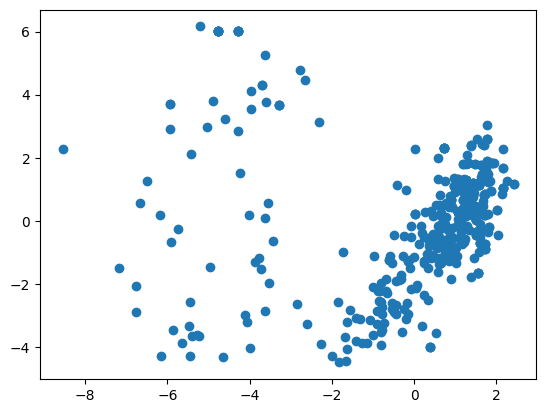

In [35]:
plt.scatter(embeddings_reduced.T[0], embeddings_reduced.T[1])

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(embeddings_reduced)



KMeans(n_clusters=3)

[253.49986867  57.59847581]


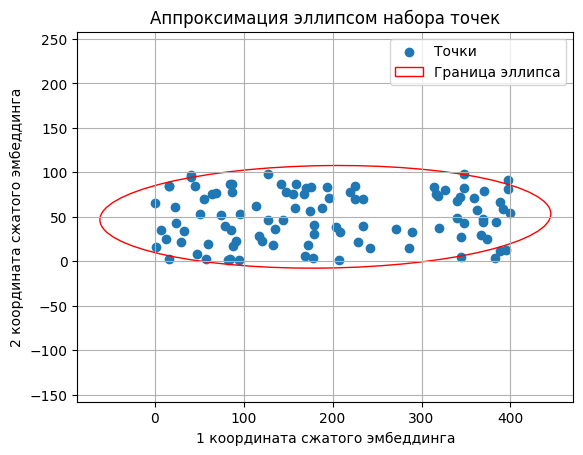

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def draw_optimal_ellipse(points, ax):
    # Преобразование входных данных в numpy массив
    points = np.array(points)
    
    # Находим центр массива точек
    center = np.mean(points, axis=0)
    
    # Выполняем анализ главных компонент
    pca = PCA(n_components=2)
    pca.fit(points)
    
    # Достаем собственные вектора и собственные значения
    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_
    
    # Масштабируем собственные значения, чтобы они соответствовали заданному уровню охвата (например, 2 стандартных отклонения)
    scale_factor = np.sqrt(eigenvalues) * 2
    print(scale_factor)
    # Построение эллипса
    ellipse = plt.matplotlib.patches.Ellipse(
        xy=center,
        width=scale_factor[0] * 2,
        height=scale_factor[1] * 2,
        angle=np.degrees(np.arctan2(*eigenvectors[0][::-1])),
        edgecolor='r',
        facecolor='none',
        label = 'Граница эллипса'
    )
    
    # Создаем график
    
    ax.scatter(points[:, 0], points[:, 1], label='Точки',)
    ax.add_patch(ellipse)
    ax.set_xlabel('1 координата сжатого эмбеддинга')
    ax.set_ylabel('2 координата сжатого эмбеддинга')
    ax.set_title('Аппроксимация эллипсом набора точек')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')
    plt.show()

# Пример использования функции
fig, ax = plt.subplots()
points = np.random.rand(100, 2) * 100  # Генерация случайных точек
D = np.array([[4, 0],[0,1]])
theta = 0
U = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
points = points @ D@U.T
draw_optimal_ellipse(points, ax)

[1.1592585 0.3116405] [2.1777742 0.9994623] 75.31186
[-2.028801  -2.6728406] [4.171637  2.2364895] -3.5101008
[-4.5819583  4.115601 ] [3.6072636 2.1666477] 65.19146


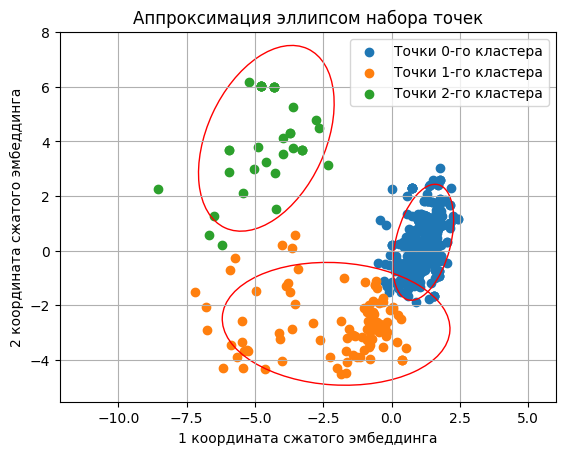

In [41]:
fig, ax = plt.subplots()
for i in range(len(km.cluster_centers_)):
    # Преобразование входных данных в numpy массив
    labels = km.labels_
    points = np.array(embeddings_reduced[km.labels_ == i])
    # Находим центр массива точек
    center = np.mean(points, axis=0)
    # Выполняем анализ главных компонент
    pca = PCA(n_components=2)
    pca.fit(points)
    
    # Достаем собственные вектора и собственные значения
    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_
    
    # Масштабируем собственные значения, чтобы они соответствовали заданному уровню охвата (например, 2 стандартных отклонения)
    scale_factor = np.sqrt(eigenvalues) * 2
    
    # Построение эллипса
    ellipse = plt.matplotlib.patches.Ellipse(
        xy=center,
        width=scale_factor[0] * 2,
        height=scale_factor[1] * 2,
        angle=np.degrees(np.arctan2(*eigenvectors[0][::-1])),
        edgecolor='r',
        facecolor='none',
    )
    
    # Создаем график
    print(center, scale_factor, np.degrees(np.arctan2(*eigenvectors[0][::-1])))
    ax.scatter(embeddings_reduced[km.labels_ == i][:, 0], embeddings_reduced[km.labels_ == i][:, 1], label='Точки {}-го кластера'.format(i),)
    ax.add_patch(ellipse)
    ax.set_xlabel('1 координата сжатого эмбеддинга')
    ax.set_ylabel('2 координата сжатого эмбеддинга')
    ax.set_title('Аппроксимация эллипсом набора точек')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

In [13]:
km.labels_ == 2

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False,